In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
claiborne = pd.read_csv('Claiborne_county_synthetic_data.csv')
copiah = pd.read_csv('Copiah_county_synthetic_data.csv')
warren = pd.read_csv('Warren_county_synthetic_data.csv')
all = pd.concat([claiborne, copiah, warren], ignore_index=True)

black = all[all['Race'] == 'Black']
white = all[all['Race'] == 'White']
other = all[all['Race'] == 'Other']

male = all[all['Gender'] == 'Male']
female = all[all['Gender'] == 'Female']

# Part 1

There are differences in racial composition between Claiborne, which has a high proportion of Black residents, and Copiah, which is predominantly White. Gender distribution appears relatively balanced across all counties.

In [62]:
# Part 1
def demographics(df, county_name):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    df['Race'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%', title=f'{county_name} Race Distribution')
    df['Gender'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', title=f'{county_name} Gender Distribution')
    df['Education Level'].value_counts().plot(kind='pie', ax=axes[2], autopct='%1.1f%%', title=f'{county_name} Education Level Distribution')
    plt.tight_layout()
    plt.show()

In [61]:
claiborne_race_dist = claiborne['Race'].value_counts(normalize=True) * 100
claiborne_race_dist = claiborne_race_dist.map(lambda x: f'{x:.1f}%')
copiah_race_dist = copiah['Race'].value_counts(normalize=True) * 100
copiah_race_dist = copiah_race_dist.map(lambda x: f'{x:.1f}%')
warren_race_dist = warren['Race'].value_counts(normalize=True) * 100
warren_race_dist = warren_race_dist.map(lambda x: f'{x:.1f}%')

claiborne_gender_dist = claiborne['Gender'].value_counts(normalize=True) * 100
claiborne_gender_dist = claiborne_gender_dist.map(lambda x: f'{x:.1f}%')
copiah_gender_dist = copiah['Gender'].value_counts(normalize=True) * 100
copiah_gender_dist = copiah_gender_dist.map(lambda x: f'{x:.1f}%')
warren_gender_dist = warren['Gender'].value_counts(normalize=True) * 100
warren_gender_dist = warren_gender_dist.map(lambda x: f'{x:.1f}%')

race_comparison = pd.DataFrame({
    'Race': claiborne_race_dist.index,
    'Claiborne': claiborne_race_dist.values,
    'Copiah': copiah_race_dist.reindex(claiborne_race_dist.index, fill_value=0).values,
    'Warren': warren_race_dist.reindex(claiborne_race_dist.index, fill_value=0).values
})

gender_comparison = pd.DataFrame({
    'Gender': claiborne_gender_dist.index,
    'Claiborne': claiborne_gender_dist.values,
    'Copiah': copiah_gender_dist.reindex(claiborne_gender_dist.index, fill_value=0).values,
    'Warren': warren_gender_dist.reindex(claiborne_gender_dist.index, fill_value=0).values
})

print("Race Distribution Comparison across Three Counties:")
print(race_comparison)
print("\nGender Distribution Comparison across Three Counties:")
print(gender_comparison)


Race Distribution Comparison across Three Counties:
    Race Claiborne Copiah Warren
0  Black     88.2%  38.1%  46.4%
1  White     10.6%  59.5%  49.6%
2  Other      1.2%   2.4%   4.0%

Gender Distribution Comparison across Three Counties:
   Gender Claiborne Copiah Warren
0  Female     50.5%  49.0%  50.4%
1    Male     49.5%  51.0%  49.6%


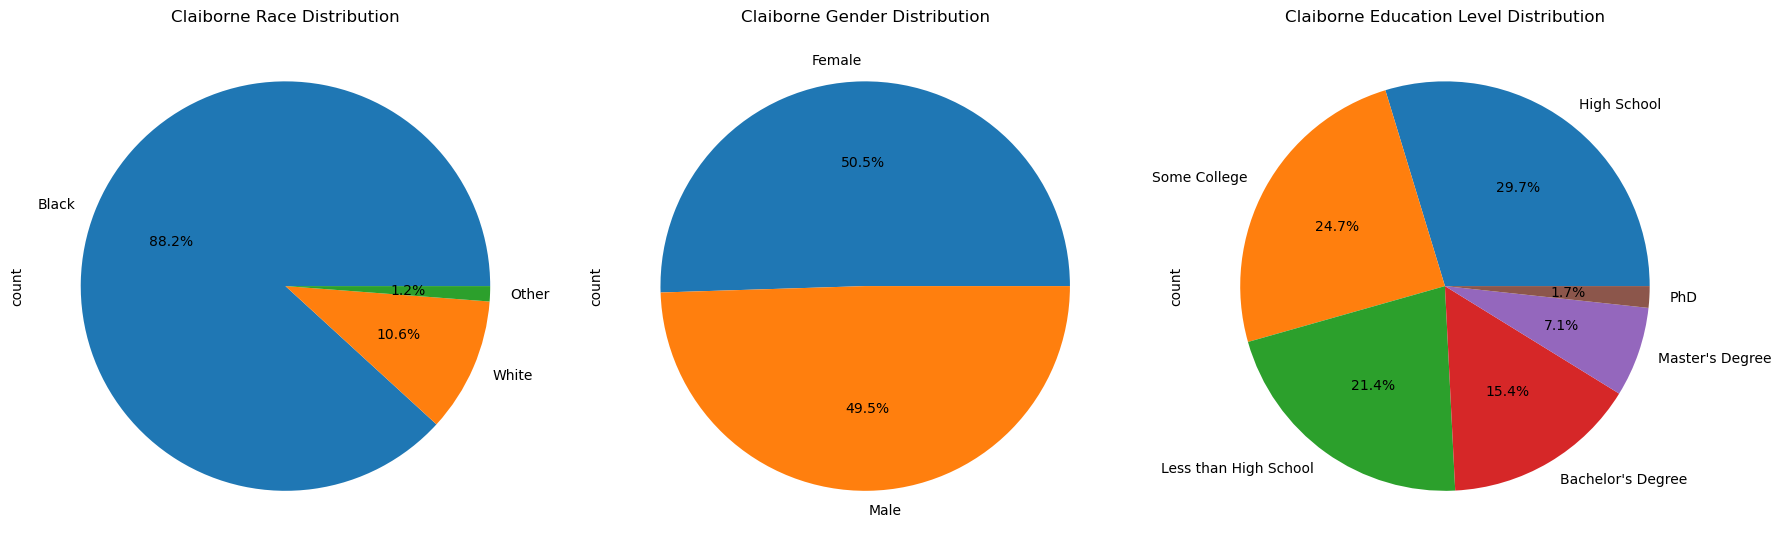

In [63]:
demographics(claiborne, 'Claiborne')

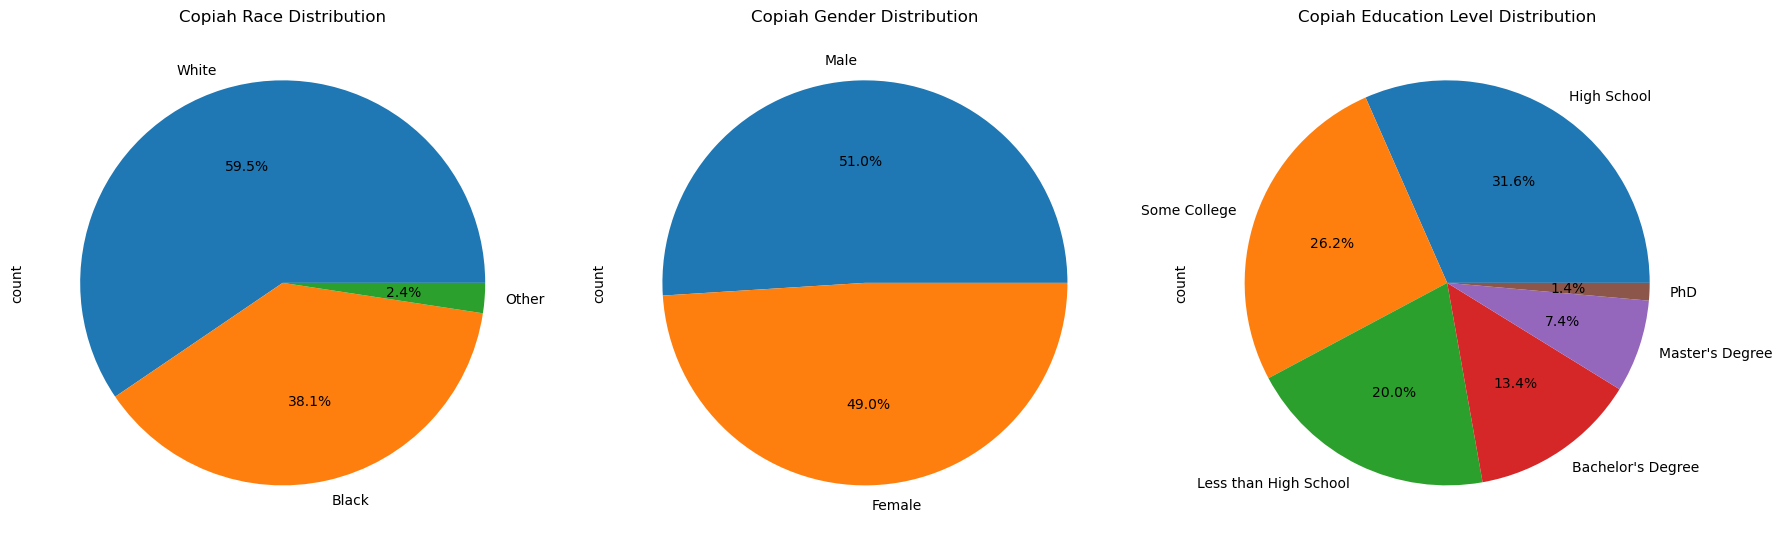

In [64]:
demographics(copiah, 'Copiah')

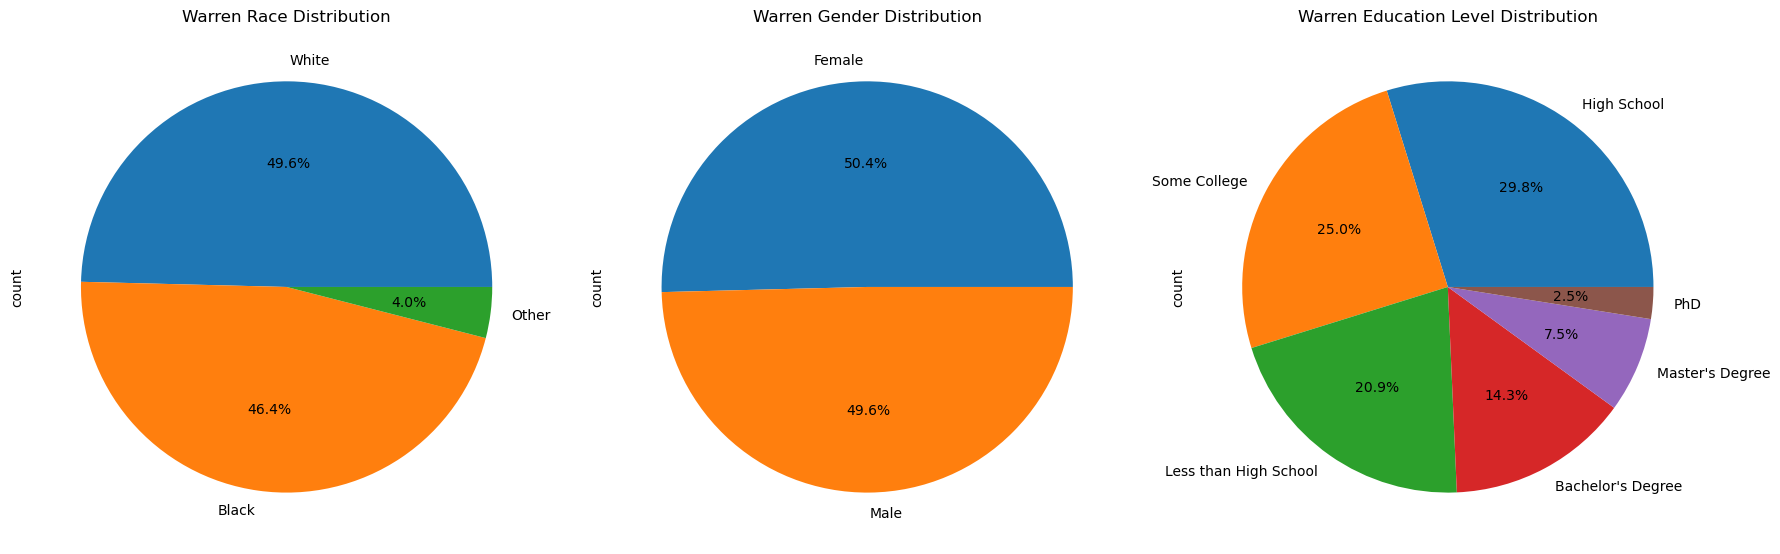

In [65]:
demographics(warren, 'Warren')

# Part 2
Claiborne has a higher average risk score for Black females and males, with a similar trend in other racial groups. Copiah shows slightly lower risk scores for Black males and females when compared to Claiborne. White and other groups in Copiah have similar average scores to those in Claiborne.Warren has a similar trend to Claiborne in terms of risk scores, with Black females and males having slightly lower scores than their counterparts in Claiborne.

Black individuals across all counties tend to have higher average risk scores compared to other racial groups, especially for females. White individuals in all counties have the lowest average risk scores, with males showing slightly lower scores than females.

In [8]:
def risk_scores(df, county_name):
    avg_risk_by_race = df.groupby('Race')['Risk Score'].mean()
    avg_risk_by_gender = df.groupby('Gender')['Risk Score'].mean()
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    avg_risk_by_race.plot(kind='bar', ax=axes[0], color='blue', title=f'{county_name} Average Risk Scores by Race')
    avg_risk_by_gender.plot(kind='bar', ax=axes[1], color='green', title=f'{county_name} Average Risk Scores by Gender')
    plt.tight_layout()
    plt.show()

In [42]:
claiborne_avg_risk = claiborne.groupby(['Race', 'Gender'])['Risk Score'].mean().reset_index().round(3)
copiah_avg_risk = copiah.groupby(['Race', 'Gender'])['Risk Score'].mean().reset_index().round(3)
warren_avg_risk = warren.groupby(['Race', 'Gender'])['Risk Score'].mean().reset_index().round(3)

claiborne_avg_risk['County'] = 'Claiborne'
copiah_avg_risk['County'] = 'Copiah'
warren_avg_risk['County'] = 'Warren'
all_counties = pd.concat([claiborne_avg_risk, copiah_avg_risk, warren_avg_risk])

pivot_df = all_counties.pivot_table(index=['Race', 'Gender'], columns='County', values='Risk Score')
pivot_df = pivot_df.reset_index()
print("Average Risk Scores by Demographic Group in Each County:")
print(pivot_df)

Average Risk Scores by Demographic Group in Each County:
County   Race  Gender  Claiborne  Copiah  Warren
0       Black  Female      5.952   5.734   5.741
1       Black    Male      5.869   5.955   5.858
2       Other  Female      4.860   5.194   4.824
3       Other    Male      5.216   3.616   4.533
4       White  Female      4.363   4.813   4.798
5       White    Male      4.651   4.826   4.951


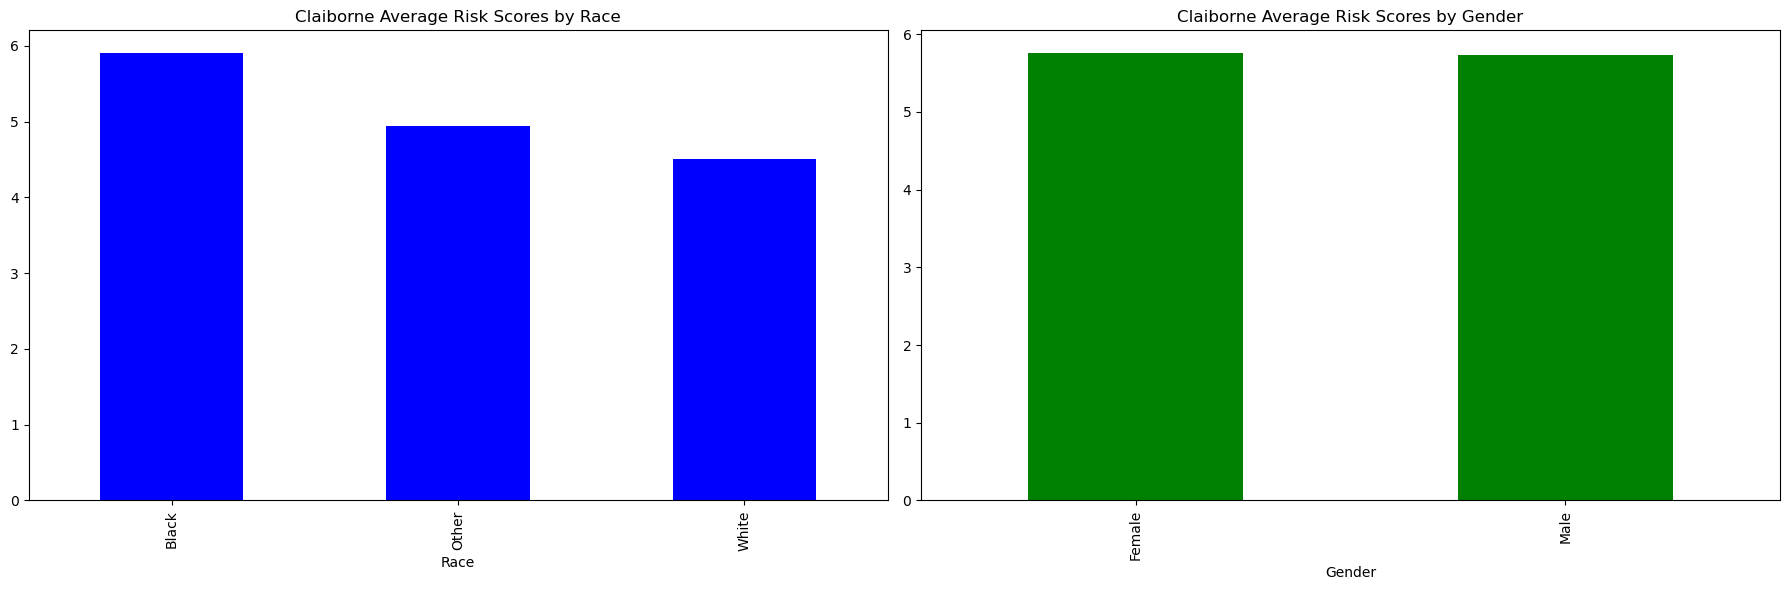

In [11]:
risk_scores(claiborne, 'Claiborne')

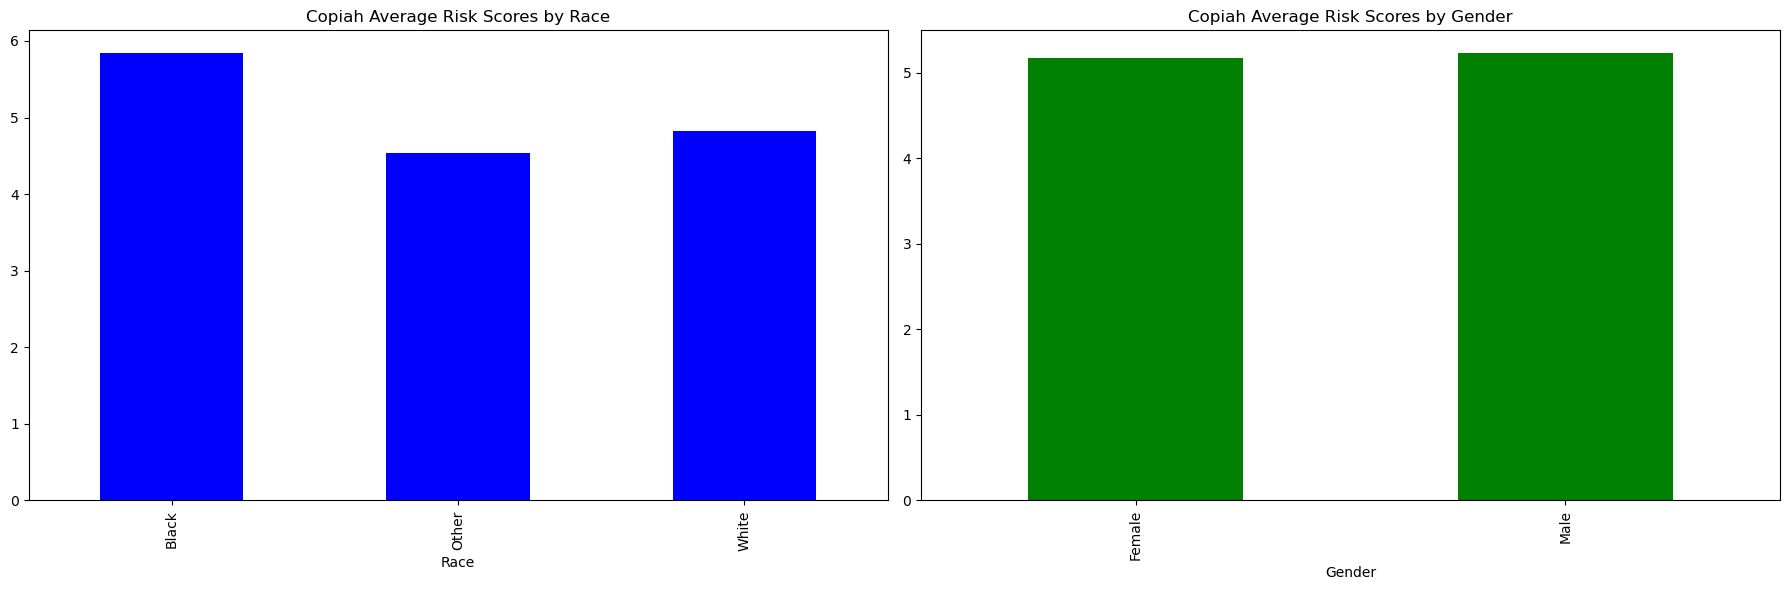

In [13]:
risk_scores(copiah, 'Copiah')

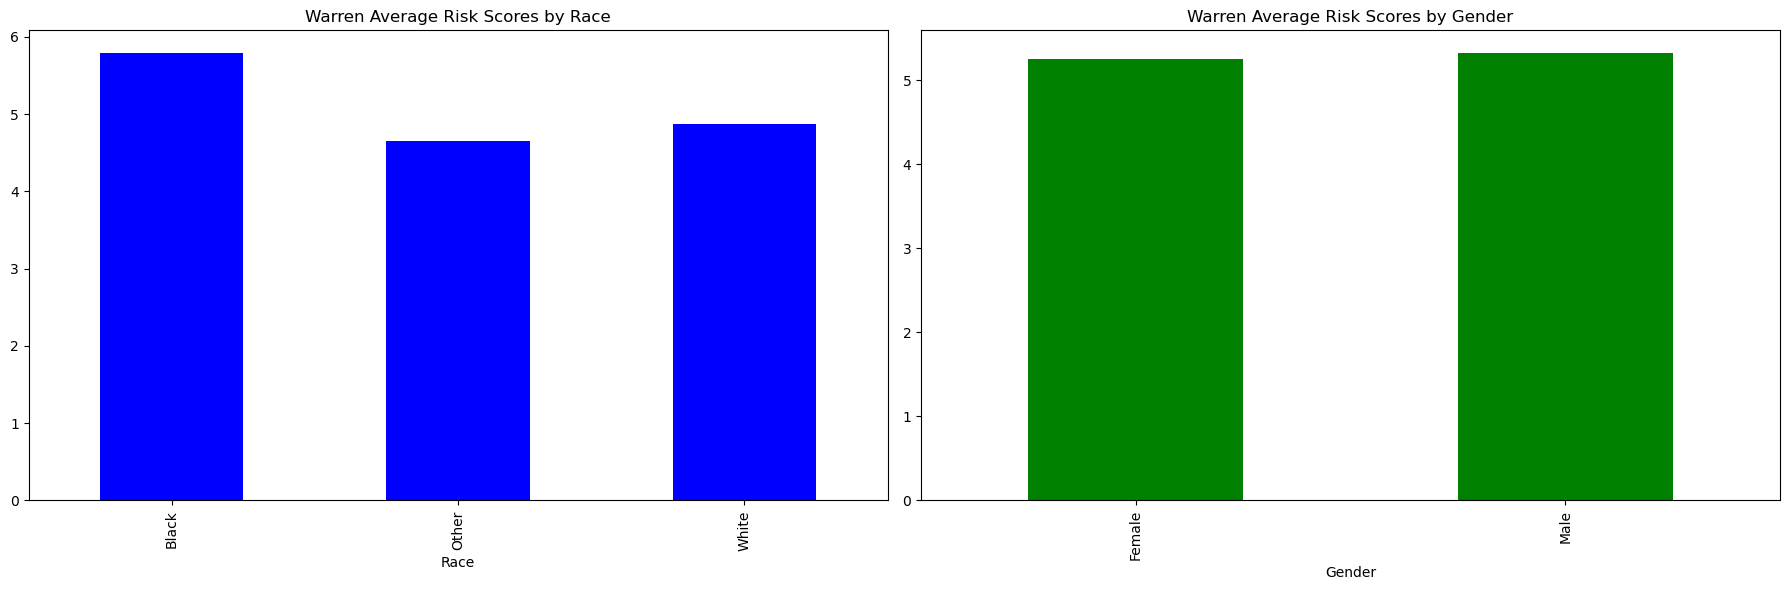

In [15]:
risk_scores(warren, 'Warren')

# Part 3
For Black groups, the risk score bin distribution reveals a significantly higher percentage of individuals in the higher-risk score categories (6-10) for those denied bail, compared to those granted bail. This suggests a possible bias where Black individuals are more likely to be assigned higher risk scores, leading to higher rejection rates for bail.

White groups show a similar pattern, with more individuals in higher-risk score categories being denied bail, though the percentage is less pronounced than in Black groups. This suggests that while there is some racial bias in decision-making, it is more evident in Black groups.

Female groups tend to have lower-risk scores compared to males, but this does not necessarily translate into a bias in bail decisions. Female groups show a balanced distribution across the bail decisions, but some discrepancies are noted in the higher-risk score bins.

Male groups have higher-risk scores overall, and there seems to be a larger discrepancy in the bail decisions, where males with higher risk scores are more likely to be denied bail.

In [89]:
def compare(df, group_name):
    bins = [0, 2, 4, 6, 8, 10, float('inf')]
    labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10+']

    df['Risk Score Binned'] = pd.cut(df['Risk Score'], bins=bins, labels=labels)
    risk_score_crosstab = pd.crosstab(df['Judge Decision'], df['Risk Score Binned'], normalize='index')*100
    judge_decision_counts = df['Judge Decision'].value_counts()

    risk_score_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), title=f'{group_name} Bail Decision vs Risk Score')
    plt.xlabel('Judge Decision')
    plt.ylabel('Percentage')
    plt.legend(title='Risk Score Binned')
    plt.tight_layout()
    plt.show()

    risk_score_crosstab_percentage = risk_score_crosstab.map(lambda x: f'{x:.2f}%')

    print(f"\n{group_name} Risk Score Distribution:")
    print(risk_score_crosstab_percentage)
    print(f"\n{group_name} Judge Decision Counts:")
    print(f"Judge Decision 0: {judge_decision_counts.get(0, 0)}")
    print(f"Judge Decision 1: {judge_decision_counts.get(1, 0)}")

C:\Users\13429\AppData\Local\Temp\ipykernel_14636\4014301818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Risk Score Binned'] = pd.cut(df['Risk Score'], bins=bins, labels=labels)


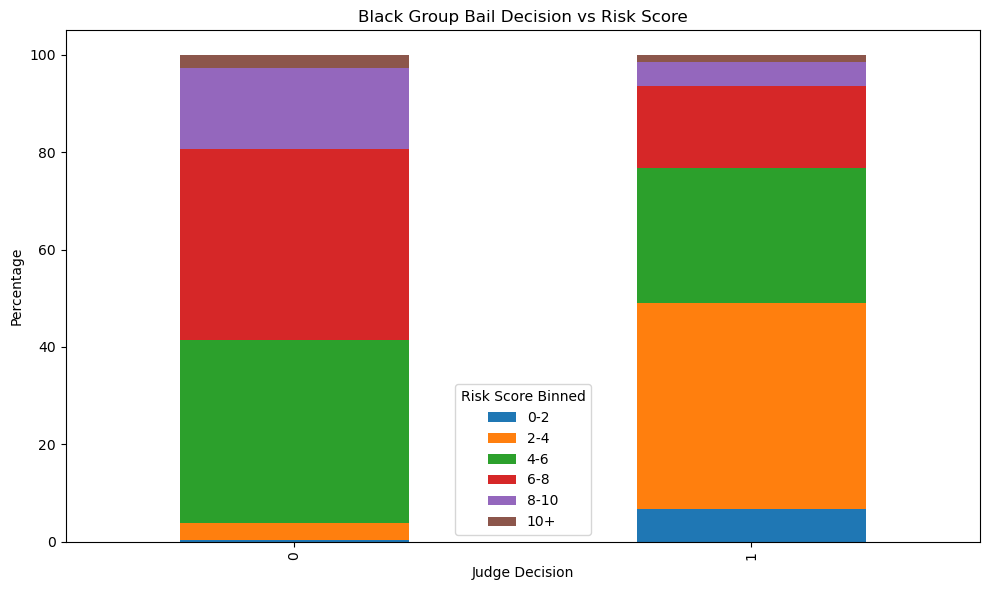


Black Group Risk Score Distribution:
Risk Score Binned    0-2     2-4     4-6     6-8    8-10    10+
Judge Decision                                                 
0                  0.35%   3.55%  37.58%  39.13%  16.71%  2.68%
1                  6.64%  42.48%  27.62%  16.78%   5.07%  1.40%

Black Group Judge Decision Counts:
Judge Decision 0: 1155
Judge Decision 1: 572


In [90]:
compare(black, 'Black Group')

C:\Users\13429\AppData\Local\Temp\ipykernel_14636\4014301818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Risk Score Binned'] = pd.cut(df['Risk Score'], bins=bins, labels=labels)


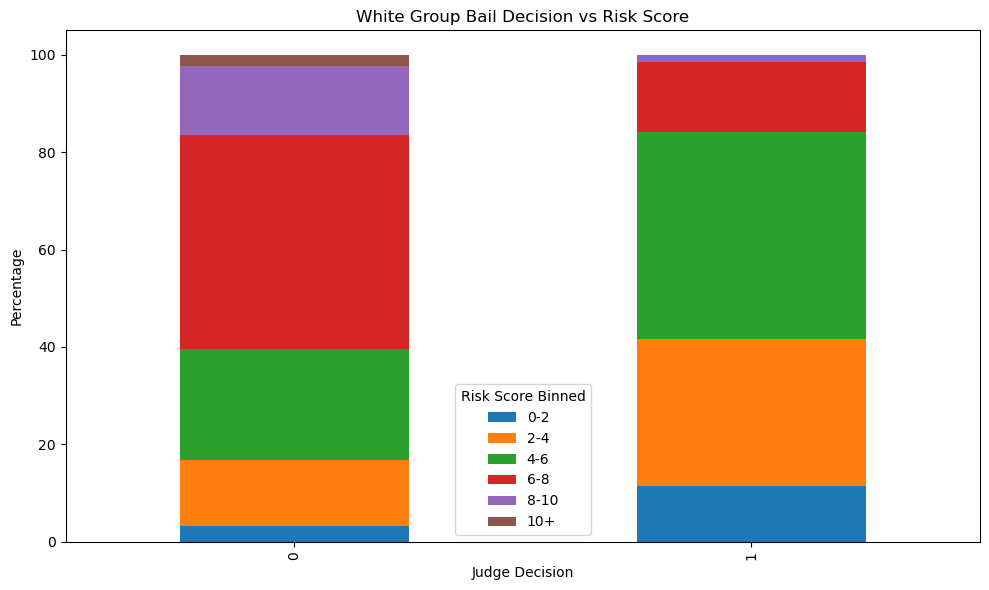


White Group Risk Score Distribution:
Risk Score Binned     0-2     2-4     4-6     6-8    8-10    10+
Judge Decision                                                  
0                   3.20%  13.66%  22.67%  43.90%  14.24%  2.33%
1                  11.37%  30.25%  42.44%  14.54%   1.29%  0.12%

White Group Judge Decision Counts:
Judge Decision 0: 344
Judge Decision 1: 853


In [92]:
compare(white, 'White Group')

C:\Users\13429\AppData\Local\Temp\ipykernel_14636\4014301818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Risk Score Binned'] = pd.cut(df['Risk Score'], bins=bins, labels=labels)


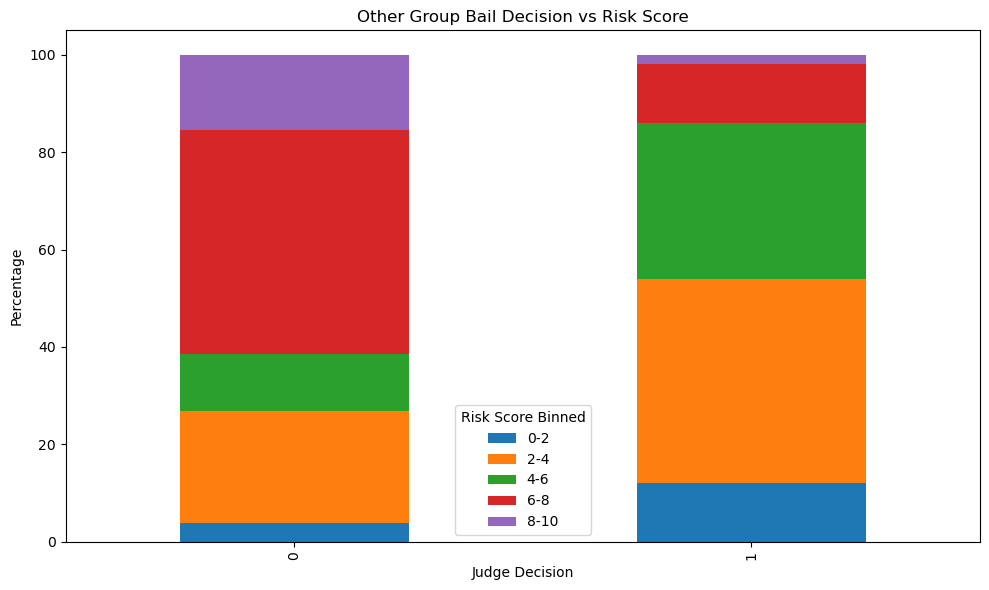


Other Group Risk Score Distribution:
Risk Score Binned     0-2     2-4     4-6     6-8    8-10
Judge Decision                                           
0                   3.85%  23.08%  11.54%  46.15%  15.38%
1                  12.00%  42.00%  32.00%  12.00%   2.00%

Other Group Judge Decision Counts:
Judge Decision 0: 26
Judge Decision 1: 50


In [93]:
compare(other, "Other Group")

C:\Users\13429\AppData\Local\Temp\ipykernel_14636\4014301818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Risk Score Binned'] = pd.cut(df['Risk Score'], bins=bins, labels=labels)


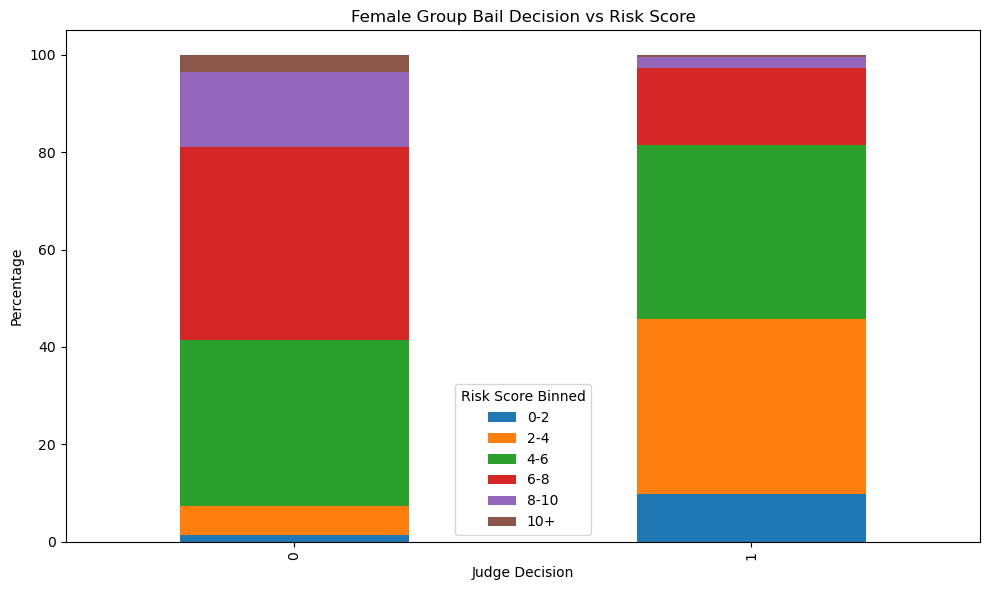


Female Group Risk Score Distribution:
Risk Score Binned    0-2     2-4     4-6     6-8    8-10    10+
Judge Decision                                                 
0                  1.31%   6.01%  34.12%  39.61%  15.42%  3.53%
1                  9.81%  35.97%  35.69%  15.80%   2.18%  0.54%

Female Group Judge Decision Counts:
Judge Decision 0: 765
Judge Decision 1: 734


In [94]:
compare(female, "Female Group")

C:\Users\13429\AppData\Local\Temp\ipykernel_14636\4014301818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Risk Score Binned'] = pd.cut(df['Risk Score'], bins=bins, labels=labels)


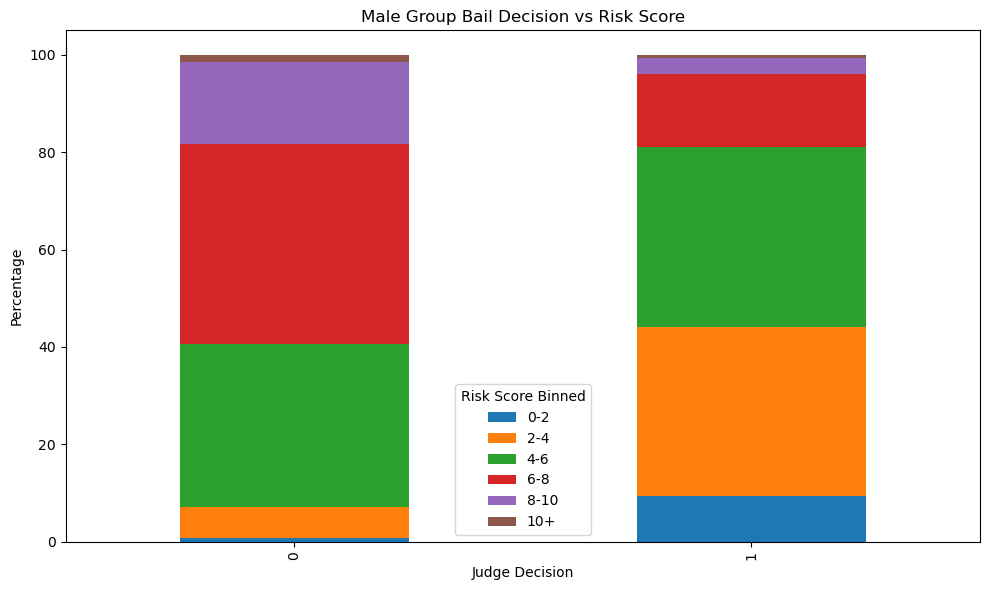


Male Group Risk Score Distribution:
Risk Score Binned    0-2     2-4     4-6     6-8    8-10    10+
Judge Decision                                                 
0                  0.79%   6.32%  33.42%  41.05%  16.84%  1.58%
1                  9.31%  34.82%  36.98%  14.84%   3.37%  0.67%

Male Group Judge Decision Counts:
Judge Decision 0: 760
Judge Decision 1: 741


In [95]:
compare(male, "Male Group")

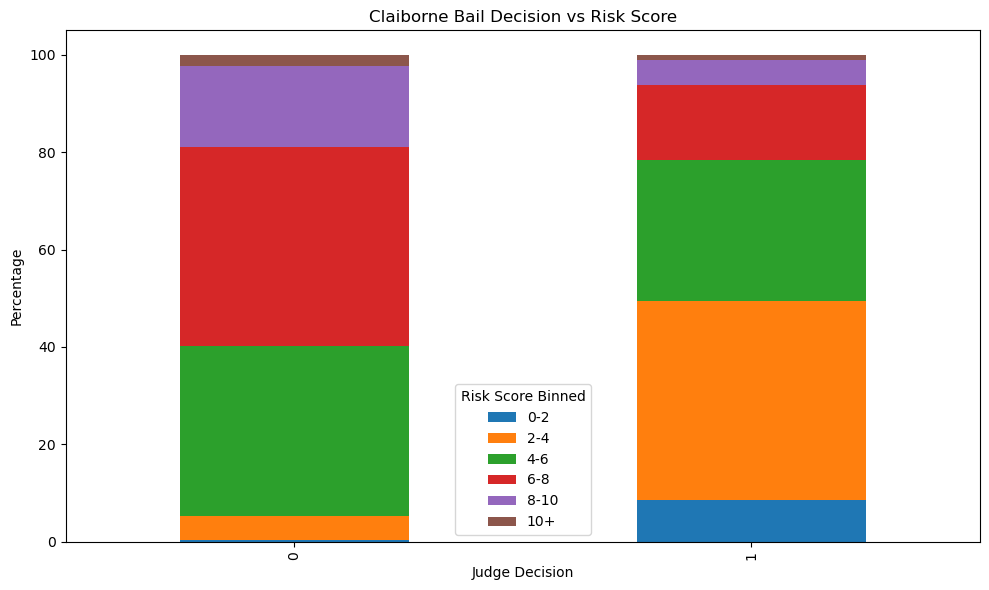


Claiborne Risk Score Distribution:
Risk Score Binned    0-2     2-4     4-6     6-8    8-10    10+
Judge Decision                                                 
0                  0.48%   4.76%  34.92%  40.95%  16.51%  2.38%
1                  8.65%  40.81%  28.92%  15.41%   5.14%  1.08%

Claiborne Judge Decision Counts:
Judge Decision 0: 630
Judge Decision 1: 370


In [97]:
compare(claiborne, "Claiborne")

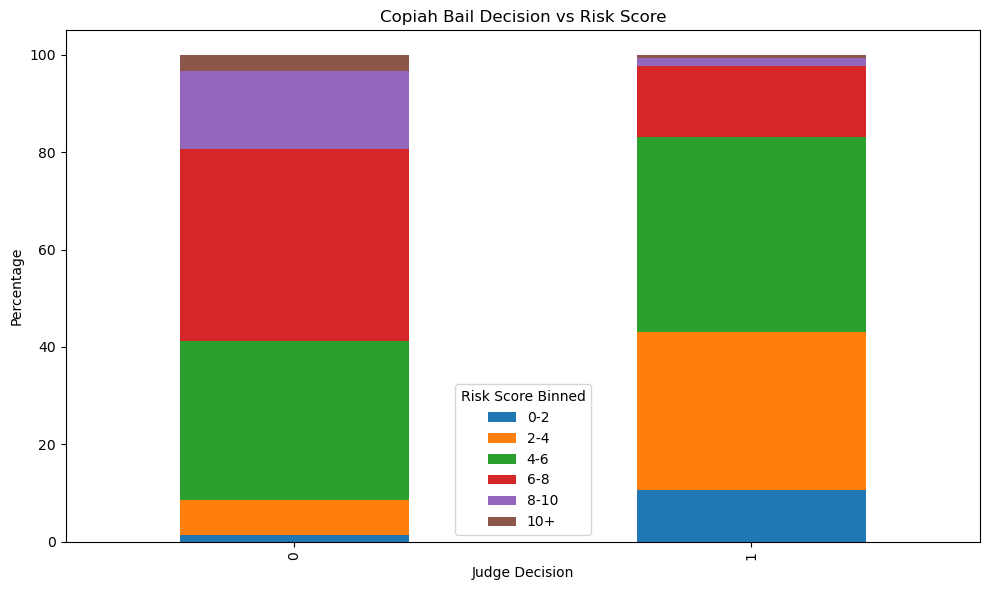


Copiah Risk Score Distribution:
Risk Score Binned     0-2     2-4     4-6     6-8    8-10    10+
Judge Decision                                                  
0                   1.40%   7.23%  32.63%  39.39%  16.08%  3.26%
1                  10.68%  32.40%  40.11%  14.54%   1.58%  0.70%

Copiah Judge Decision Counts:
Judge Decision 0: 429
Judge Decision 1: 571


In [96]:
compare(copiah, "Copiah")

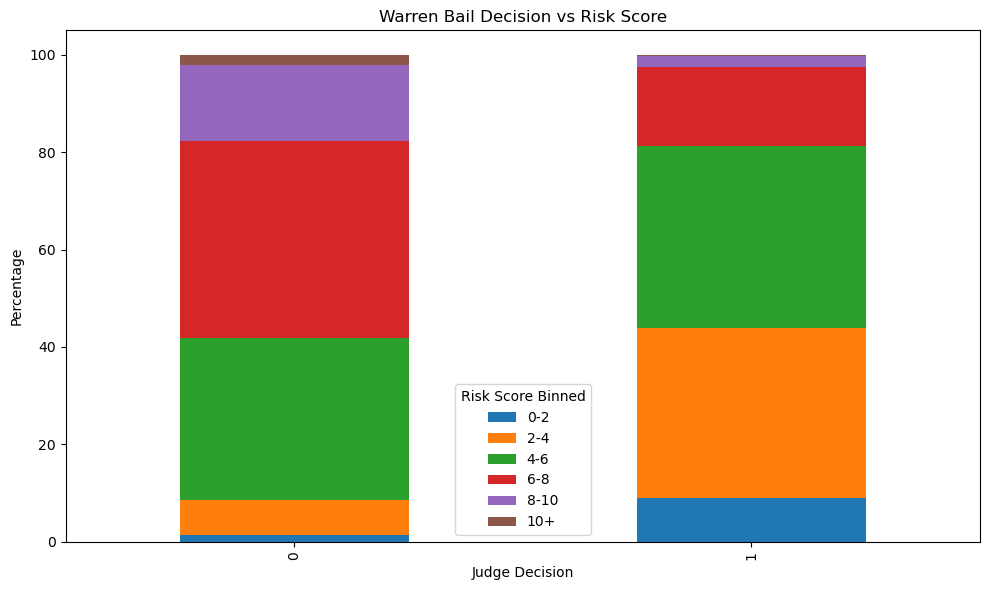


Warren Risk Score Distribution:
Risk Score Binned    0-2     2-4     4-6     6-8    8-10    10+
Judge Decision                                                 
0                  1.50%   7.08%  33.26%  40.34%  15.67%  2.15%
1                  8.99%  34.83%  37.45%  16.10%   2.43%  0.19%

Warren Judge Decision Counts:
Judge Decision 0: 466
Judge Decision 1: 534


In [98]:
compare(warren, "Warren")

# Part 4
Black individuals have a higher False Negative Rate, indicating they are more likely to be misclassified as low risk and therefore denied bail. In contrast, White individuals experience a higher False Positive Rate, suggesting that they are more likely to be flagged as high risk when they may not be. Additionally, both males and females face issues with False Positive Rates, indicating bias in how the model evaluates risk across gender lines as well.

In [83]:
def reoffense(df, group_name):
    TP = df[(df['Judge Decision'] == 1) & (df['Re-offense'] == 1)].shape[0]
    FP = df[(df['Judge Decision'] == 1) & (df['Re-offense'] == 0)].shape[0]
    TN = df[(df['Judge Decision'] == 0) & (df['Re-offense'] == 0)].shape[0]
    FN = df[(df['Judge Decision'] == 0) & (df['Re-offense'] == 1)].shape[0]
    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)

    metrics = {'False Positive Rate': FPR, 'False Negative Rate': FNR}
    bars = plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green'])
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3))
    plt.title(f'{group_name} Fairness Metrics: FPR & FNR')
    plt.ylabel('Rate')
    plt.show()

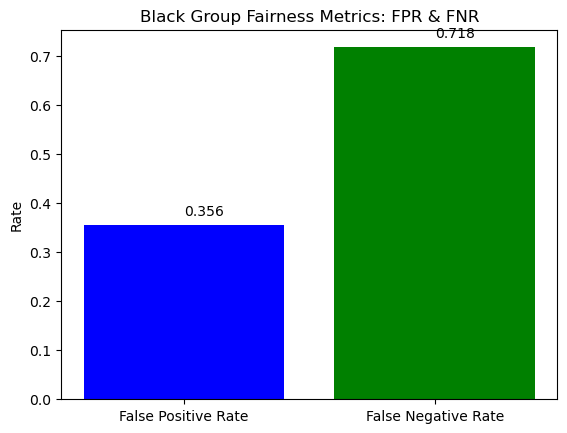

In [84]:
reoffense(black, 'Black Group')

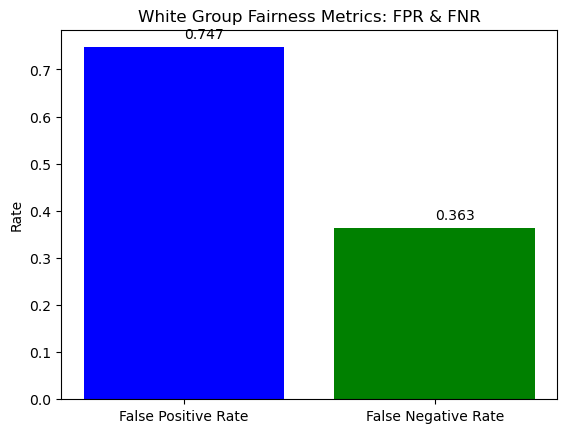

In [85]:
reoffense(white, 'White Group')

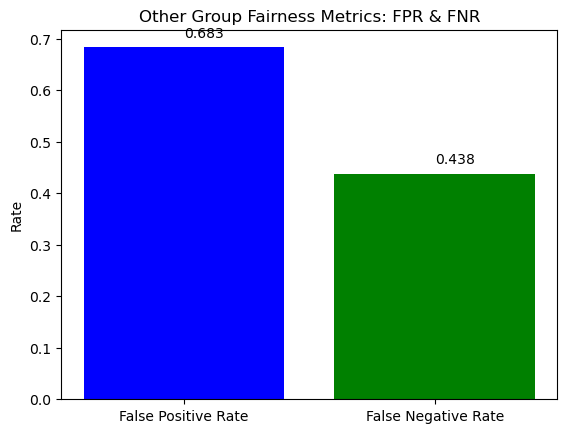

In [86]:
reoffense(other, "Other Group")

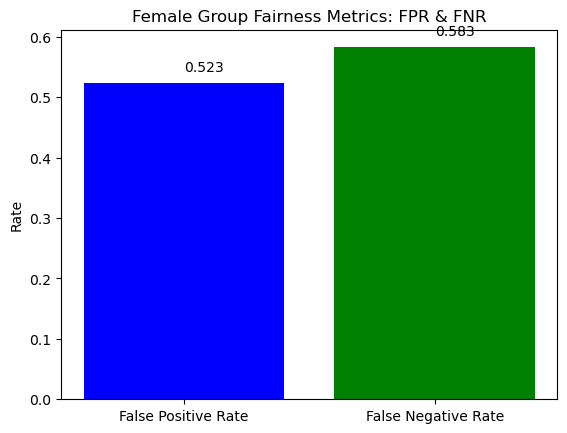

In [87]:
reoffense(female, "Female Group")

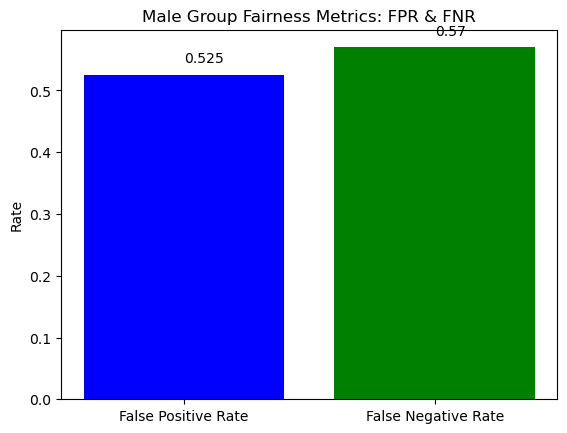

In [88]:
reoffense(male, "Male Group")